In [1]:
# 40'

from utils import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df3 = pd.read_pickle("./pickles_temp/V3.pkl")

# Elimino columnas que muestran colinealidad con otras 

,Valores Nulos,% de Valores Nulos
id,0,0.0
amount_tsh,0,0.0
date_recorded,0,0.0
funder,4414,7.4
gps_height,21934,36.9
installer,4432,7.5
longitude,1812,3.1
latitude,1812,3.1
wpt_name,2,0.0
num_private,0,0.0


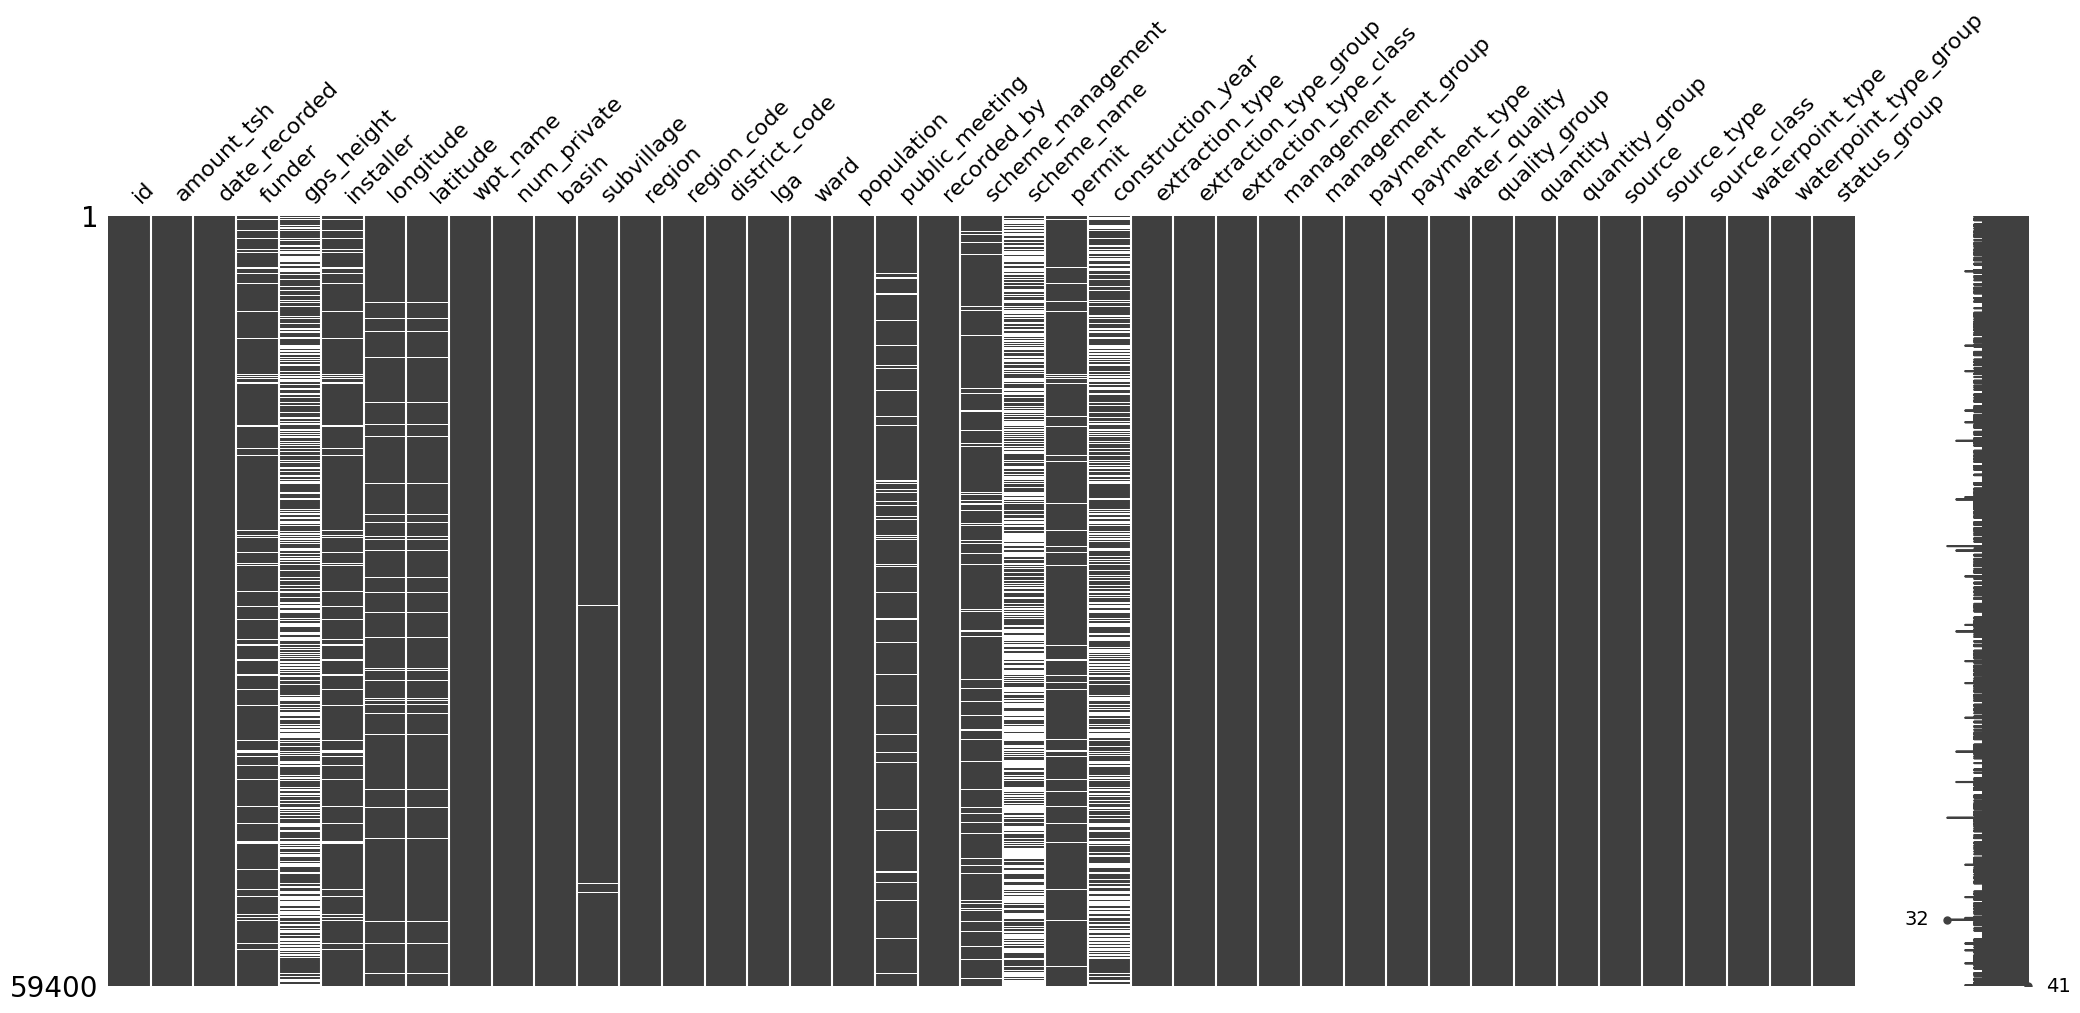

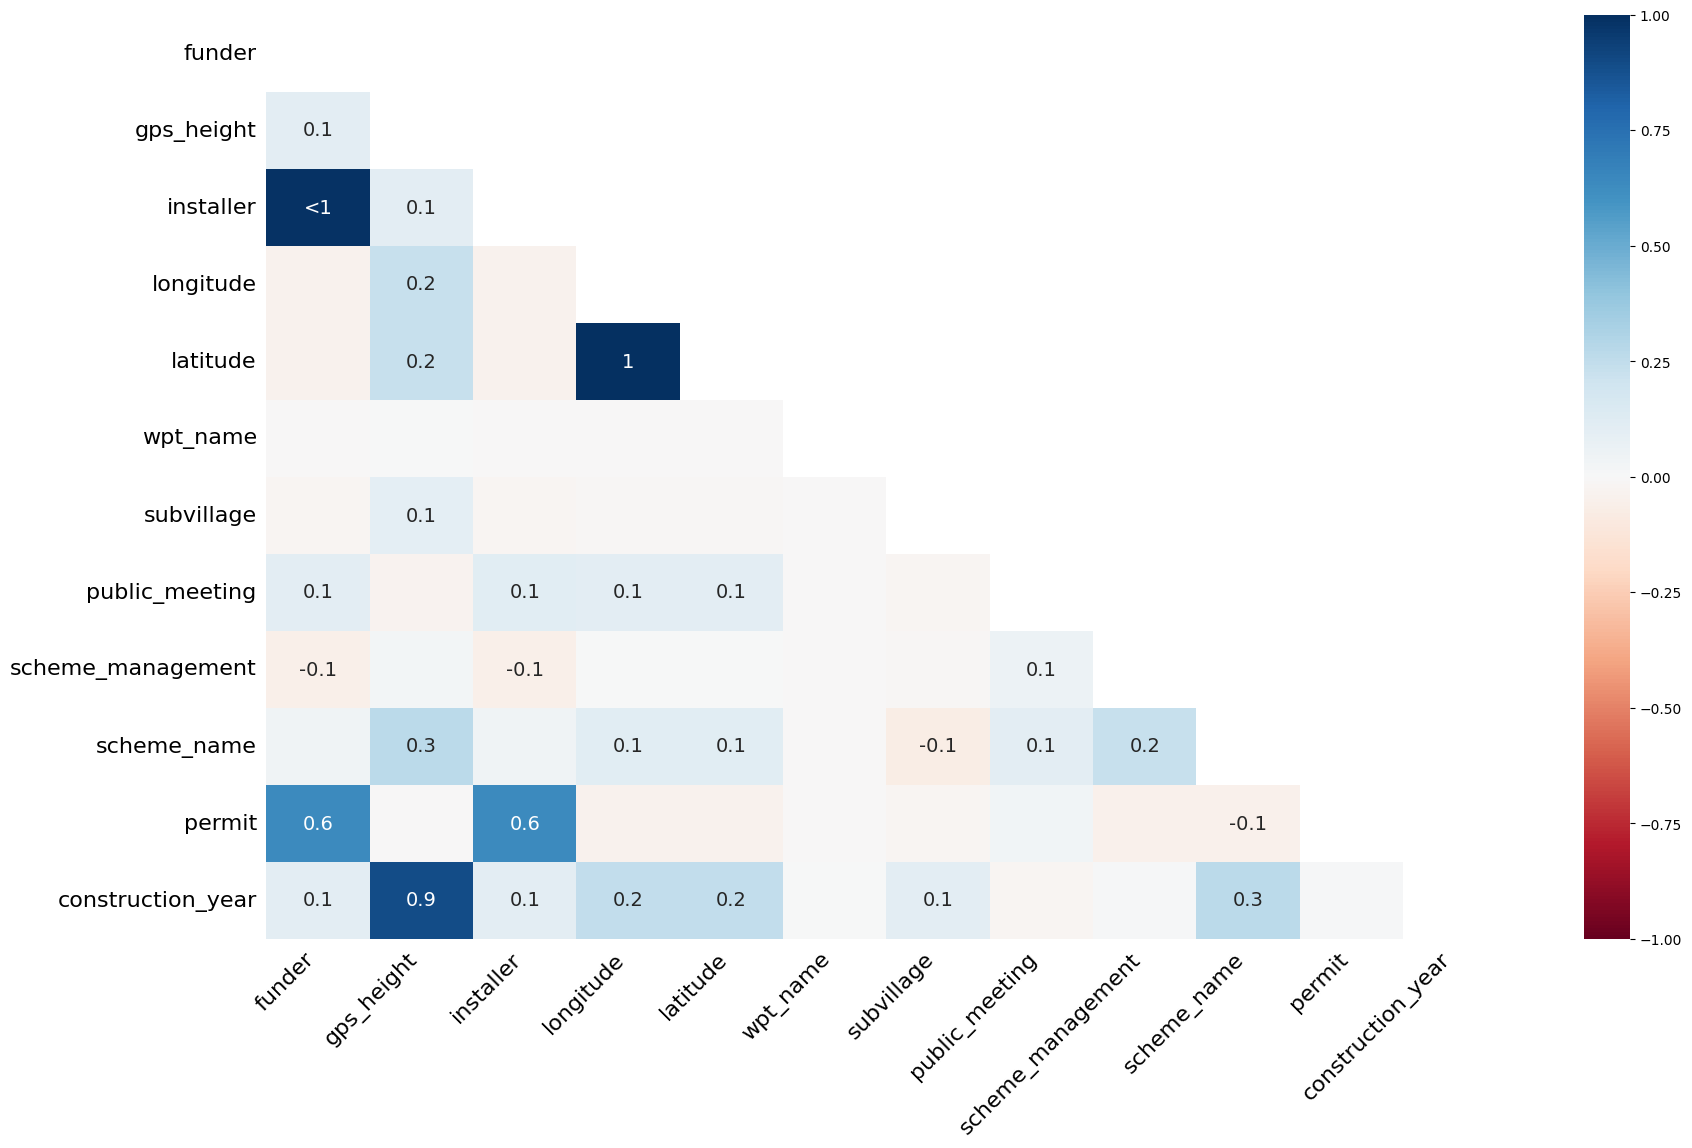

In [3]:
# tenemos cuidado a la hora de eliminar columnas. Los missings podrían presentar correlacion entre otras variables
msno.matrix(df3) 
msno.heatmap(df3)
missing_values_summary(df3)


In [4]:
df3['recorded_by'].describe()


count                       59400
unique                          1
top       GeoData Consultants Ltd
freq                        59400
Name: recorded_by, dtype: object

In [5]:
#Solo hay una entrada
del df3['recorded_by']

In [6]:
df3['scheme_name'].describe()
# Tiene muchos unicos, tiene casi un 50% de valors perdidos y los missings no muestran correlacion con otros nulos

count     30590
unique     2695
top           K
freq        682
Name: scheme_name, dtype: object

In [7]:
del df3['scheme_name']

-------------- EXTRACTION_TYPE_CLASS ---------------
count       59400
unique          7
top       gravity
freq        26780
Name: extraction_type_class, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64
extraction_type_class
other           6430
submersible     6179
motorpump       2987
rope pump        451
wind-powered     117
Name: count, dtype: int64


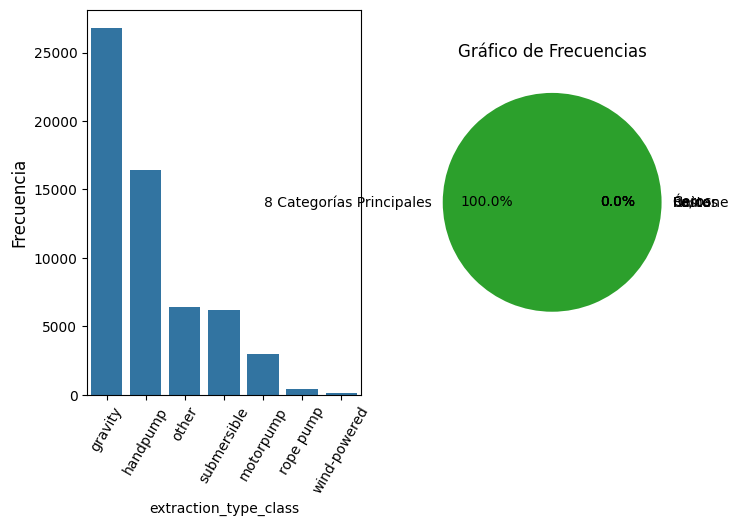

---------------------------------------------


In [8]:
""" Son casi identicas: 
    'extraction_type',
    'extraction_type_group',
    'extraction_type_class'
extraction_type_class es la más representativa""" 
descripcion_categorica(df3, 'extraction_type_class')

In [9]:
del df3['extraction_type']
del df3['extraction_type_group']

-------------- MANAGEMENT ---------------
count     59400
unique       12
top         vwc
freq      40507
Name: management, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64
management
other             844
company           685
unknown           561
other - school     99
trust              78
Name: count, dtype: int64


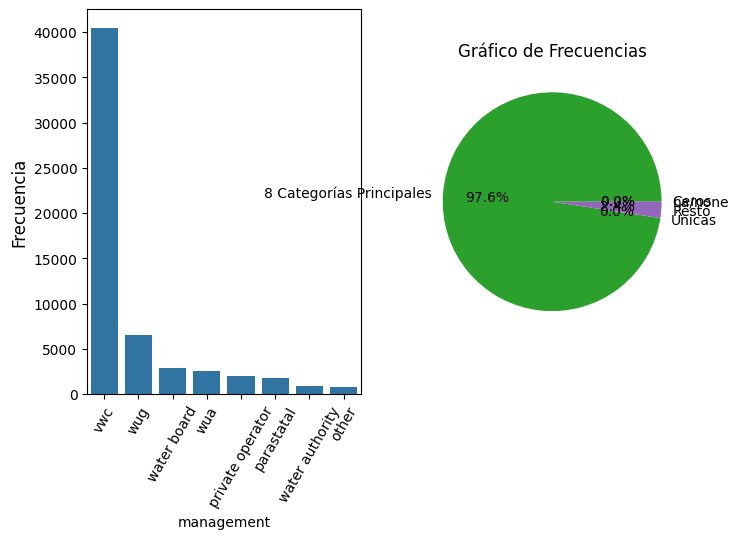

---------------------------------------------


In [10]:
""" 'management',
    'management_group',
Son muy parecidas
"""
descripcion_categorica(df3, 'management')


-------------- MANAGEMENT_GROUP ---------------
count          59400
unique             5
top       user-group
freq           52490
Name: management_group, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64
management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64


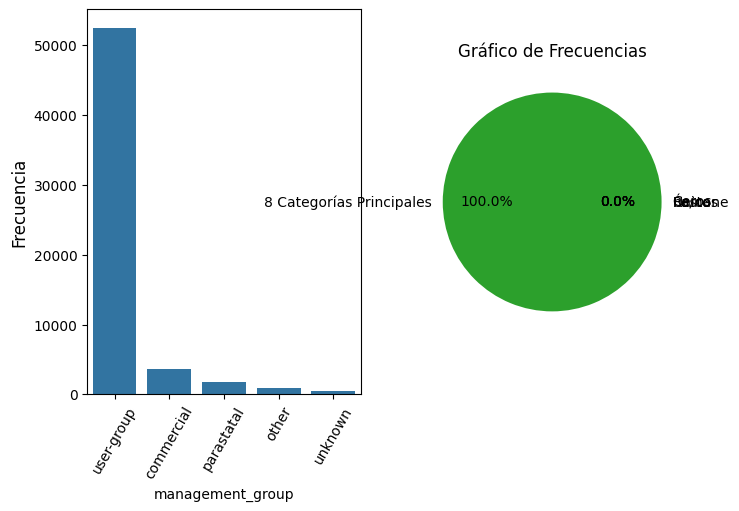

---------------------------------------------


In [11]:
descripcion_categorica(df3, 'management_group')


In [12]:
# Conservo la ultima y sumo other a unknown
del df3['management']

In [13]:
df3['management_group'].replace(['other', 'unknown'], 'other/unknown', inplace = True)


-------------- PAYMENT ---------------
count         59400
unique            7
top       never pay
freq          25348
Name: payment, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64
payment
pay monthly              8300
unknown                  8157
pay when scheme fails    3914
pay annually             3642
other                    1054
Name: count, dtype: int64


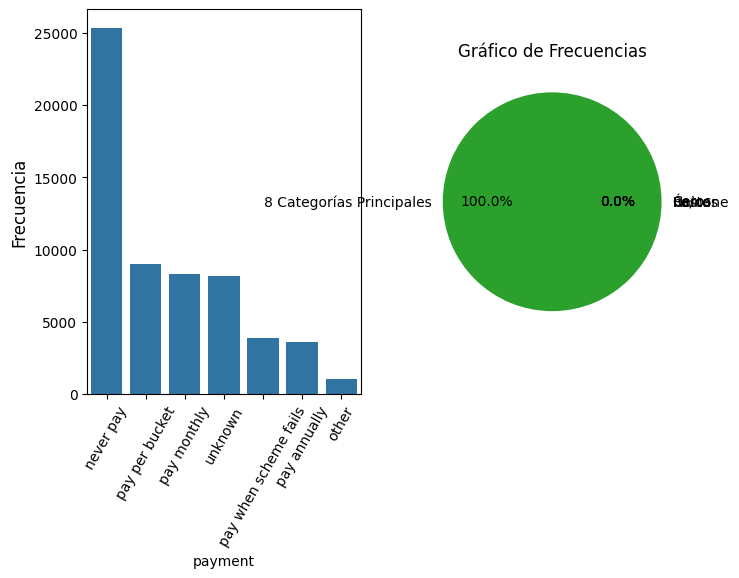

---------------------------------------------


In [14]:
# 'payment',
# 'payment_type',
descripcion_categorica(df3, 'payment')


-------------- PAYMENT_TYPE ---------------
count         59400
unique            7
top       never pay
freq          25348
Name: payment_type, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: count, dtype: int64
payment_type
monthly       8300
unknown       8157
on failure    3914
annually      3642
other         1054
Name: count, dtype: int64


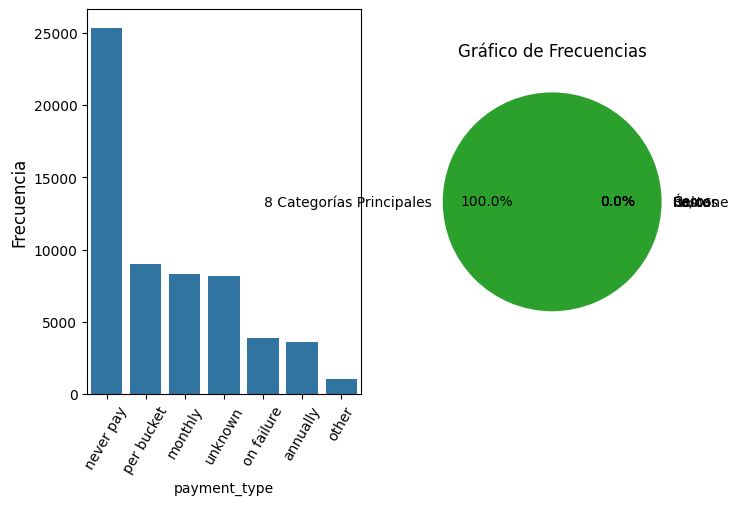

---------------------------------------------


In [15]:
descripcion_categorica(df3, 'payment_type')

In [16]:
# Elimino payment por ser igual
# junto unknown y other
df3['payment_type'].replace(['other', 'unknown'], 'other/unknown', inplace = True)


In [17]:
del df3['payment']

-------------- WATER_QUALITY ---------------
count     59400
unique        8
top        soft
freq      50818
Name: water_quality, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


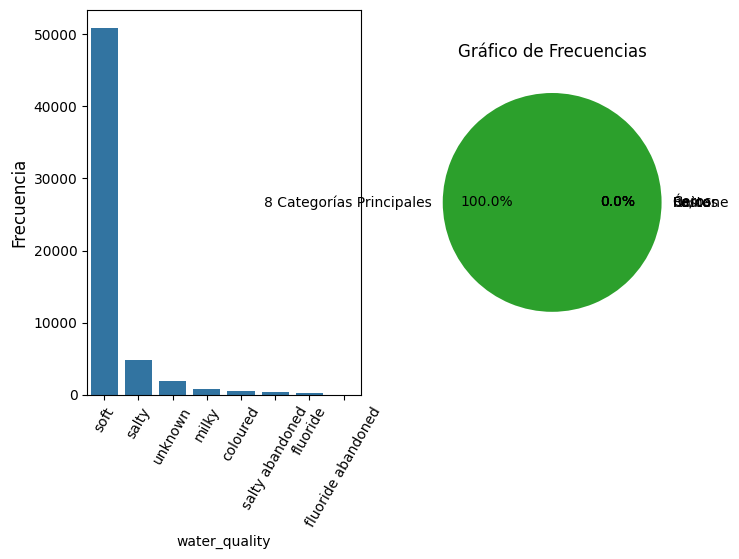

---------------------------------------------


In [18]:
# Exploro 'water_quality' y 'quality_group',
descripcion_categorica(df3, 'water_quality', 0)



-------------- QUALITY_GROUP ---------------
count     59400
unique        6
top        good
freq      50818
Name: quality_group, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


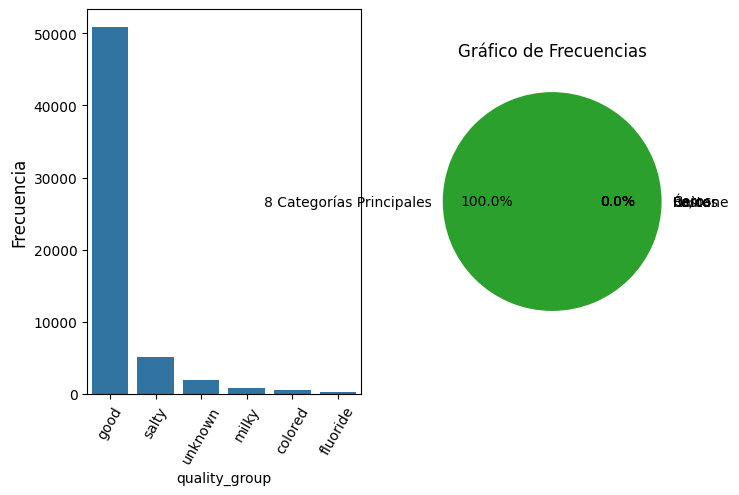

---------------------------------------------


In [19]:
descripcion_categorica(df3, 'quality_group', 0)


In [20]:
# tenemos otras columnas donde se indica si está abandonado, luego quitamos water quality
del df3['water_quality']

-------------- QUANTITY ---------------
count      59400
unique         5
top       enough
freq       33186
Name: quantity, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


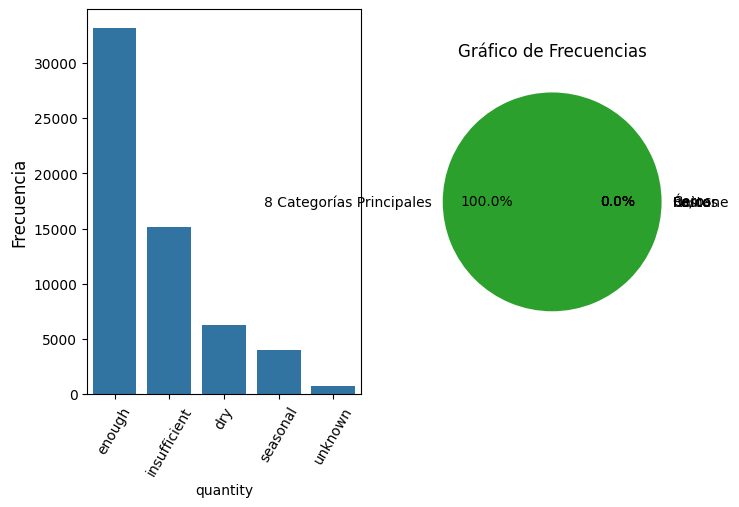

---------------------------------------------


In [21]:
# Exploro 
#   'quantity',
#   'quantity_group',
descripcion_categorica(df3, 'quantity', 0)

-------------- QUANTITY_GROUP ---------------
count      59400
unique         5
top       enough
freq       33186
Name: quantity_group, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


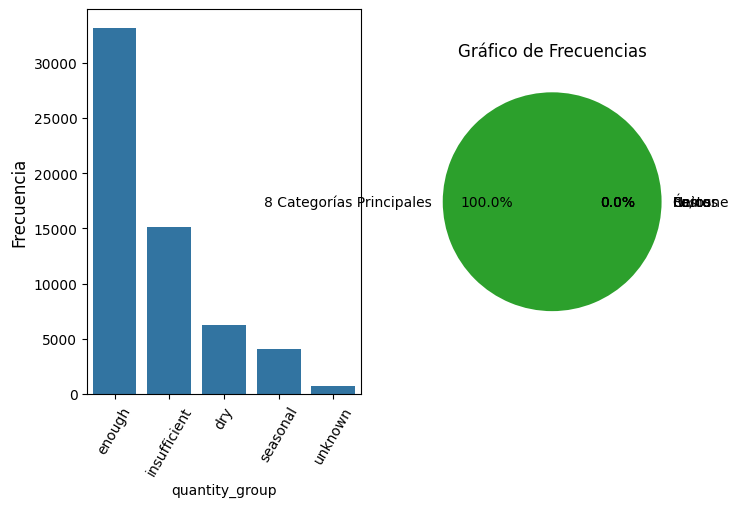

---------------------------------------------


In [22]:
descripcion_categorica(df3, 'quantity_group', 0)

In [23]:
# Elimino quantity_group. Son iguales.
del df3['quantity_group']

In [24]:
# Aprovecho para añadir unkown a Nan. Obviamente debe estar en una de esas categorias.
df3['quantity'].replace('unknown', np.nan, inplace = True)

-------------- SOURCE ---------------
count      59400
unique        10
top       spring
freq       17021
Name: source, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
Name: count, dtype: int64
source
dam        656
other      212
unknown     66
Name: count, dtype: int64


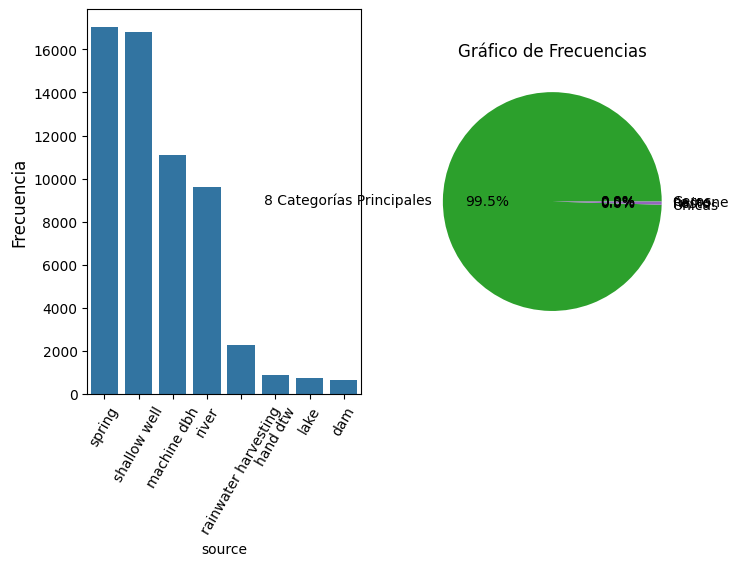

---------------------------------------------


In [25]:
# Exploro:
# 'source',
# 'source_type',
descripcion_categorica(df3, 'source', 9)

-------------- SOURCE_TYPE ---------------
count      59400
unique         7
top       spring
freq       17021
Name: source_type, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64
source_type
rainwater harvesting    2295
dam                      656
other                    278
Name: count, dtype: int64


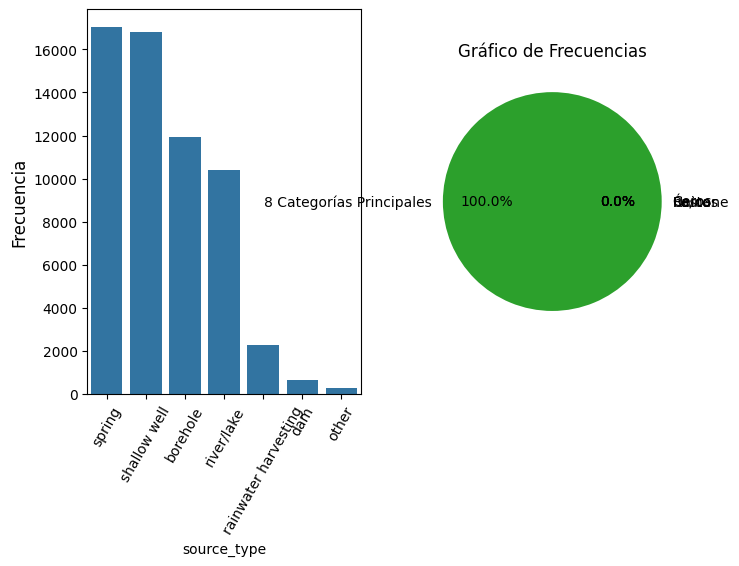

---------------------------------------------


In [26]:
descripcion_categorica(df3, 'source_type', 9)

In [27]:
# me quedo con source_type porque combina other y unknown
del df3['source']

-------------- SOURCE_CLASS ---------------
count           59400
unique              3
top       groundwater
freq            45794
Name: source_class, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


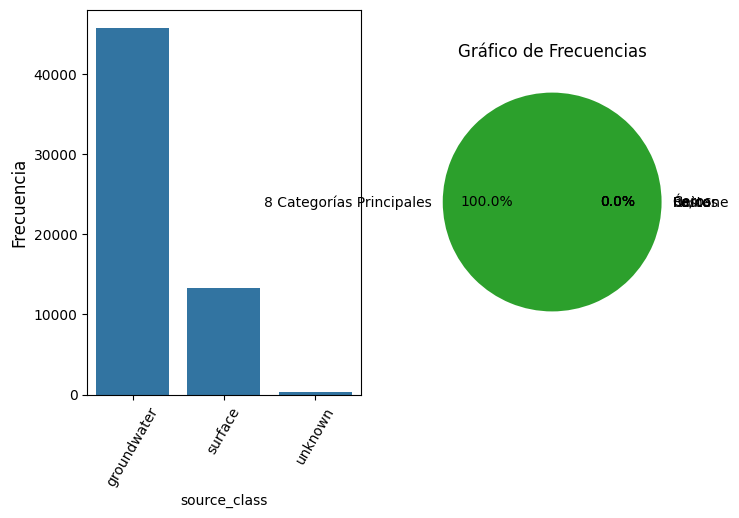

---------------------------------------------


In [28]:
# Exploro source_class
descripcion_categorica(df3, 'source_class', 0)

In [29]:
# aplico unknown como missing
df3['source_class']. replace('unknown', np.nan, inplace = True)


-------------- WATERPOINT_TYPE ---------------
count                  59400
unique                     7
top       communal standpipe
freq                   28522
Name: waterpoint_type, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


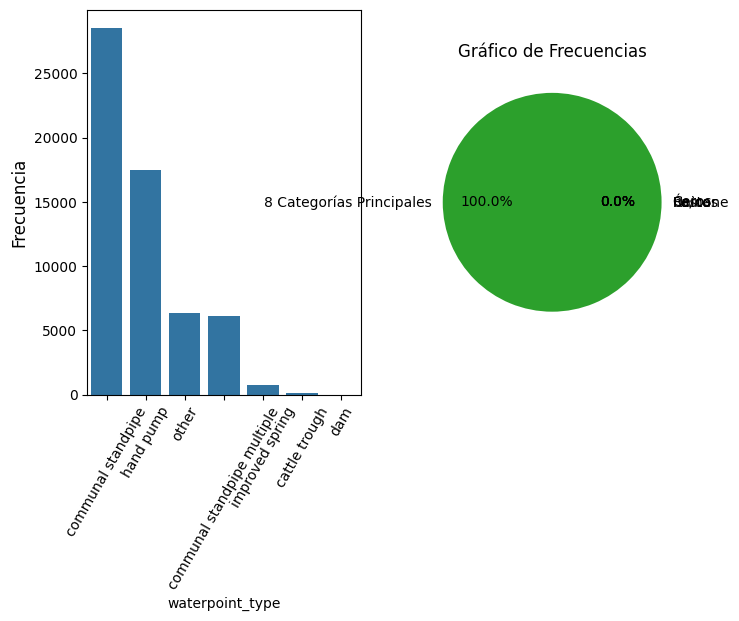

---------------------------------------------


In [30]:
# Exploro
# 'waterpoint_type',
# 'waterpoint_type_group'
descripcion_categorica(df3, 'waterpoint_type', 0)

-------------- WATERPOINT_TYPE_GROUP ---------------
count                  59400
unique                     6
top       communal standpipe
freq                   34625
Name: waterpoint_type_group, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


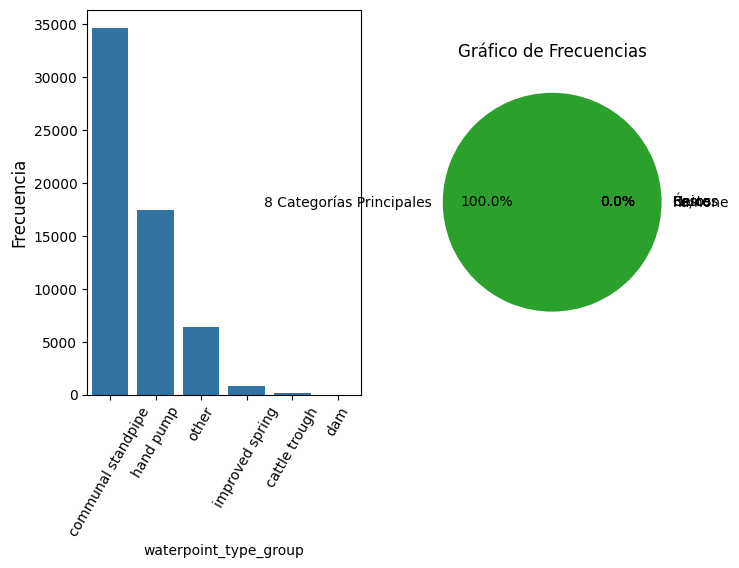

---------------------------------------------


In [31]:
descripcion_categorica(df3, 'waterpoint_type_group', 0)

In [32]:
# Exactamente iguales 
del df3['waterpoint_type_group']

In [33]:
df3.shape

(59400, 31)

In [ ]:
df3.to_pickle("./pickles_temp/V3_1.pkl")

Perfecto! Hasta aqui tenemos la base con la que poder trabajar e iterar. Hasta ahora hemos trabajado sobre seguro. Ahora toca probar

Hemos definido más missings reales y hemos eliminado columnas que sobraban. 

La versión V4 imputará missings.